# DSC 305 Lab 5: Image Sementation and Compression




**Muchiri Kahwai**  
**Lab Partner:** Arthur Melo  
**DSC 305 S23**  
**Lab 5: Image Sementation and Compression**

## Import Libraries

We started by importing several libraries that are essential for image processing and analysis. NumPy was used for numerical computations, including the representation of the image as a 3D NumPy array and the computation of the uncompressed and compressed sizes of the image. Pillow (PIL Fork) was used to read, manipulate, and save the images. We also used the scikit-learn library to implement the KMeans algorithm for image compression. Finally, we used Matplotlib to visualize the original and compressed images.

In [2]:
# Importing relevant packages. 
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os



## Import an image 


In [3]:
# Importing an image 
input_image_path = 'images/Fifa World Cup Trophy.jpg'
input_image = Image.open(input_image_path)

## Convert the image to a NumPy array



Image array shape: (932, 1455, 3)
Image data type: uint8
Pixel value at (0, 0): [231 244 253]
Image size (pixels): 1356060
Number of unique colors: 96586
Top 5 most frequent colors:
1. Color [ 96 126  36], Count: 5508
2. Color [ 98 128  38], Count: 5748
3. Color [ 97 127  37], Count: 5939
4. Color [105 135  45], Count: 6043
5. Color [104 134  44], Count: 6633
Color range (R, G, B): [255 255 255]


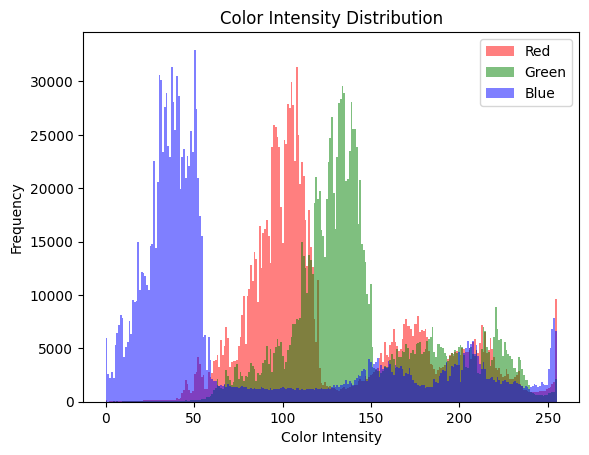

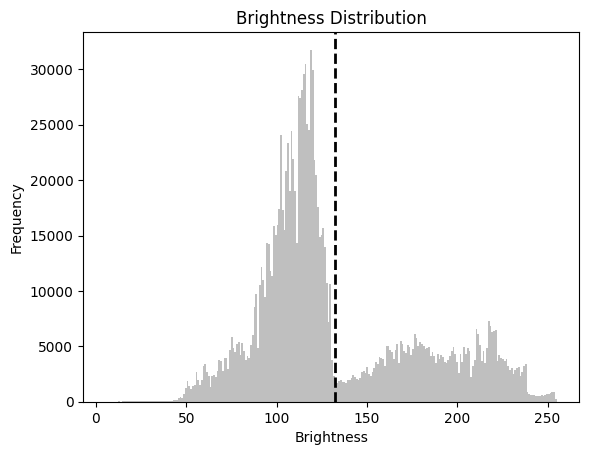

Average brightness: 132.35


In [4]:
# Converting the image into an array
image_array = np.array(input_image)

# Exploring the array representation of the image 

print("Image array shape:", image_array.shape)
print("Image data type:", image_array.dtype)

# Exploring image representation

print("Pixel value at (0, 0):", image_array[0, 0])


# Number of pixels in the image
print("Image size (pixels):", image_array.shape[0] * image_array.shape[1])

# Number of unique colors in the image
unique_colors, counts = np.unique(image_array.reshape(-1, 3), axis=0, return_counts=True)
print("Number of unique colors:", len(unique_colors))

# Most frequent colors
num_top_colors = 5
frequent_colors_indices = np.argsort(counts)[-num_top_colors:]
frequent_colors = unique_colors[frequent_colors_indices]
frequent_color_counts = counts[frequent_colors_indices]

print(f"Top {num_top_colors} most frequent colors:")
for i, color in enumerate(frequent_colors):
    print(f"{i+1}. Color {color}, Count: {frequent_color_counts[i]}")

    
# Color range
color_range = np.ptp(unique_colors, axis=0)
print("Color range (R, G, B):", color_range)


# Color intenstity distribution

red_channel = image_array[:, :, 0].flatten()
green_channel = image_array[:, :, 1].flatten()
blue_channel = image_array[:, :, 2].flatten()

plt.hist(red_channel, bins=256, color='red', alpha=0.5, label='Red')
plt.hist(green_channel, bins=256, color='green', alpha=0.5, label='Green')
plt.hist(blue_channel, bins=256, color='blue', alpha=0.5, label='Blue')
plt.legend(loc='upper right')
plt.xlabel('Color Intensity')
plt.ylabel('Frequency')
plt.title('Color Intensity Distribution')
plt.show()



# Image brightness

def calculate_brightness(color_values):
    red, green, blue = color_values
    return (0.299 * red) + (0.587 * green) + (0.114 * blue)

brightness_values = np.apply_along_axis(calculate_brightness, 2, image_array).flatten()
mean_brightness = np.mean(brightness_values)

plt.hist(brightness_values, bins=256, color='gray', alpha=0.5)
plt.axvline(mean_brightness, color='black', linestyle='dashed', linewidth=2)
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.title('Brightness Distribution')
plt.show()

print(f"Average brightness: {mean_brightness:.2f}")



### <u> <b> Interpretation </u> </b>

- The shape (932, 1455, 3) means that the image has 932 rows, 1455 columns, and 3 color channels (RGB). 
- The data type uint8 means that each color channel value ranges from 0 to 255.
- The pixel value at (0, 0) is [231, 244, 253], meaning the pixel has a high intensity for each color channel, indicating that it's a light-colored pixel. 
- The number of pixels is 1356060 suggesting that this image falls in the category of medium to high-resolution images.
- The image has  96,586 distinct colors meaning that it has a diverse number of colors.
- Intrepreting the 5 top colors : 
     1. **Color [ 96 126  36]**: This color has red intensity of 96, green intensity of 126, and blue intensity of 36. This combination results in a shade of green, and it appears 5,508 times in the image.

    2. **Color [ 98 128  38]**: This color has red intensity of 98, green intensity of 128, and blue intensity of 38. This combination results in a slightly different shade of green, and it appears 5,748 times in the image.

    3. **Color [ 97 127  37]**: This color has red intensity of 97, green intensity of 127, and blue intensity of 37. This combination results in another shade of green, slightly different from the previous two, and it appears 5,939 times in the image.

    4. **Color [105 135  45]**: This color has red intensity of 105, green intensity of 135, and blue intensity of 45. This combination results in a shade of green that is a bit brighter than the previous three, and it appears 6,043 times in the image.

    5. **Color [104 134  44]**: This color has red intensity of 104, green intensity of 134, and blue intensity of 44. This combination results in a shade of green that is very similar to the previous one, and it appears 6,633 times in the image.

- This information suggests different that green is the most frequent color in the image. This is true because the the image background is green grass. This intrepretation corraboarates the image. 

- The color range of [255, 255, 255] shows that the image has a wide variety of colors.

- The average brightness of 132.35 suggests a moderate level of brightness, leaning  more towards the brighter side.


## Experiment with the image data



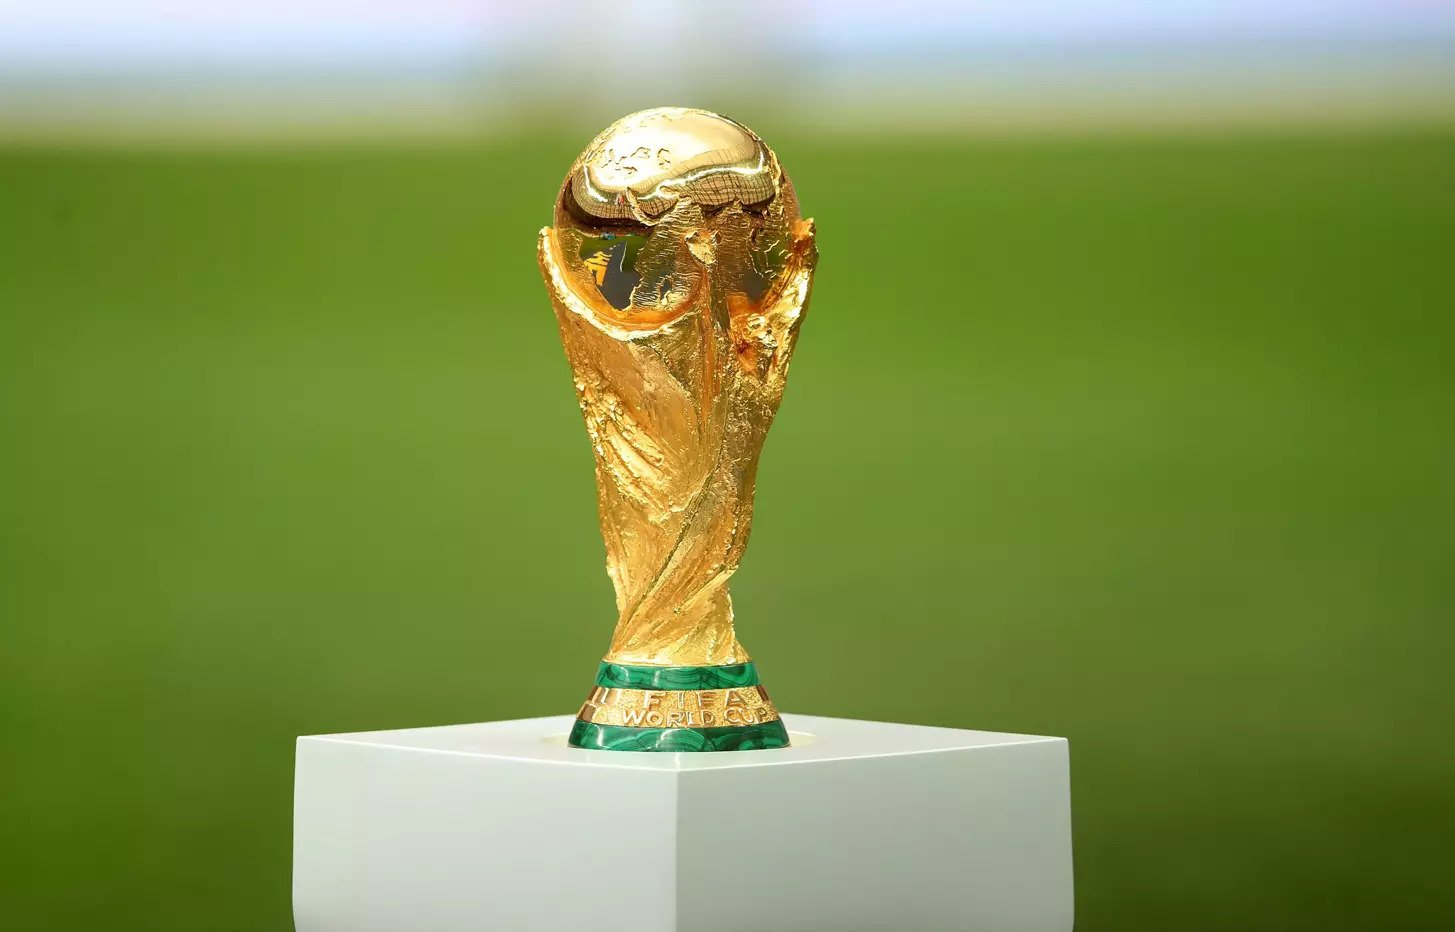

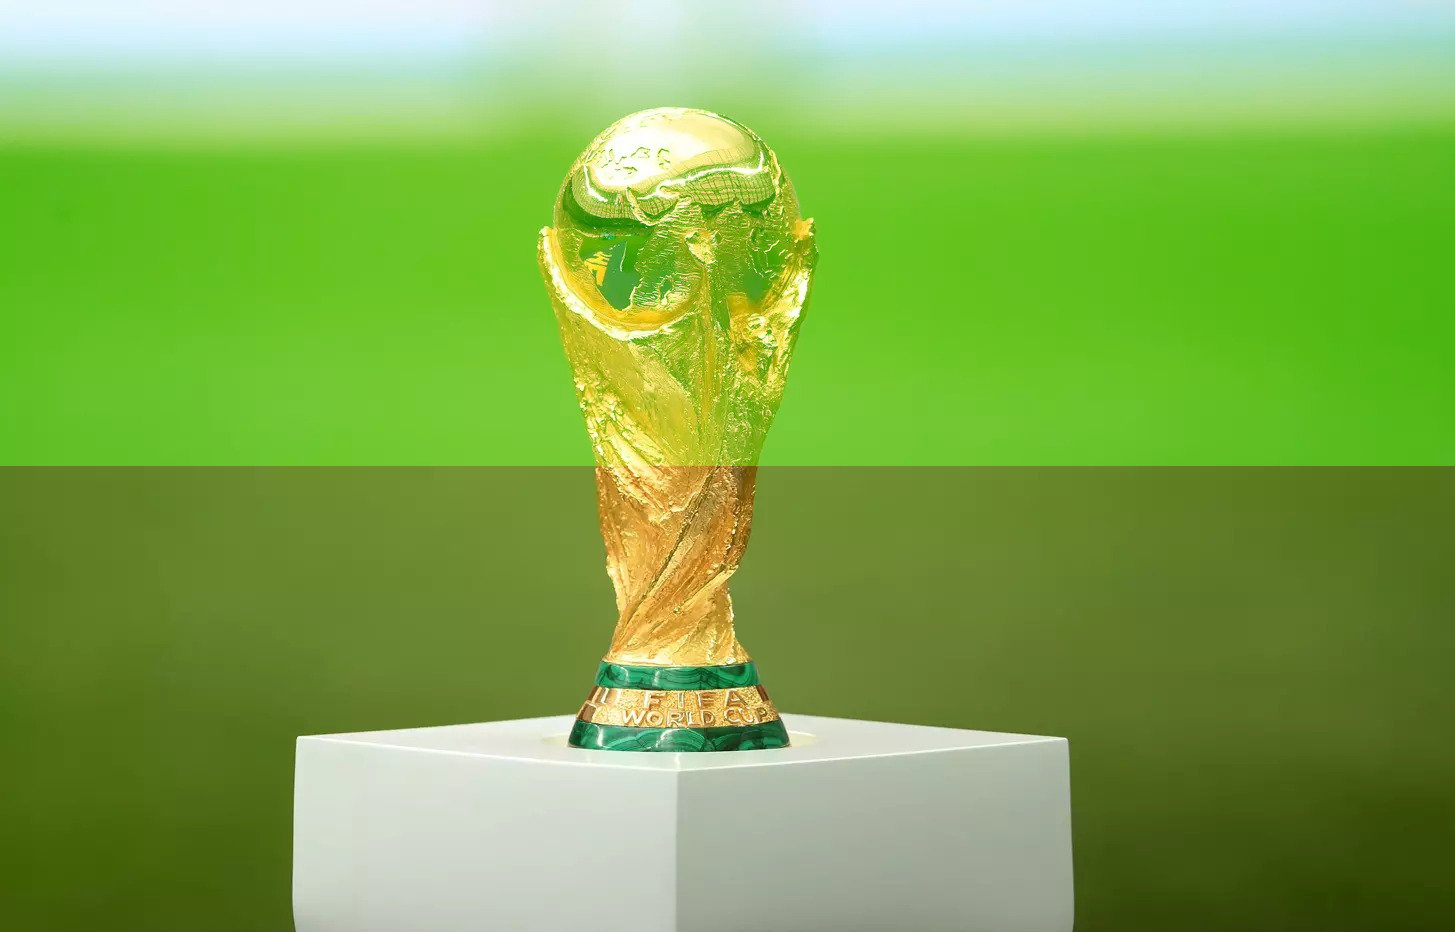

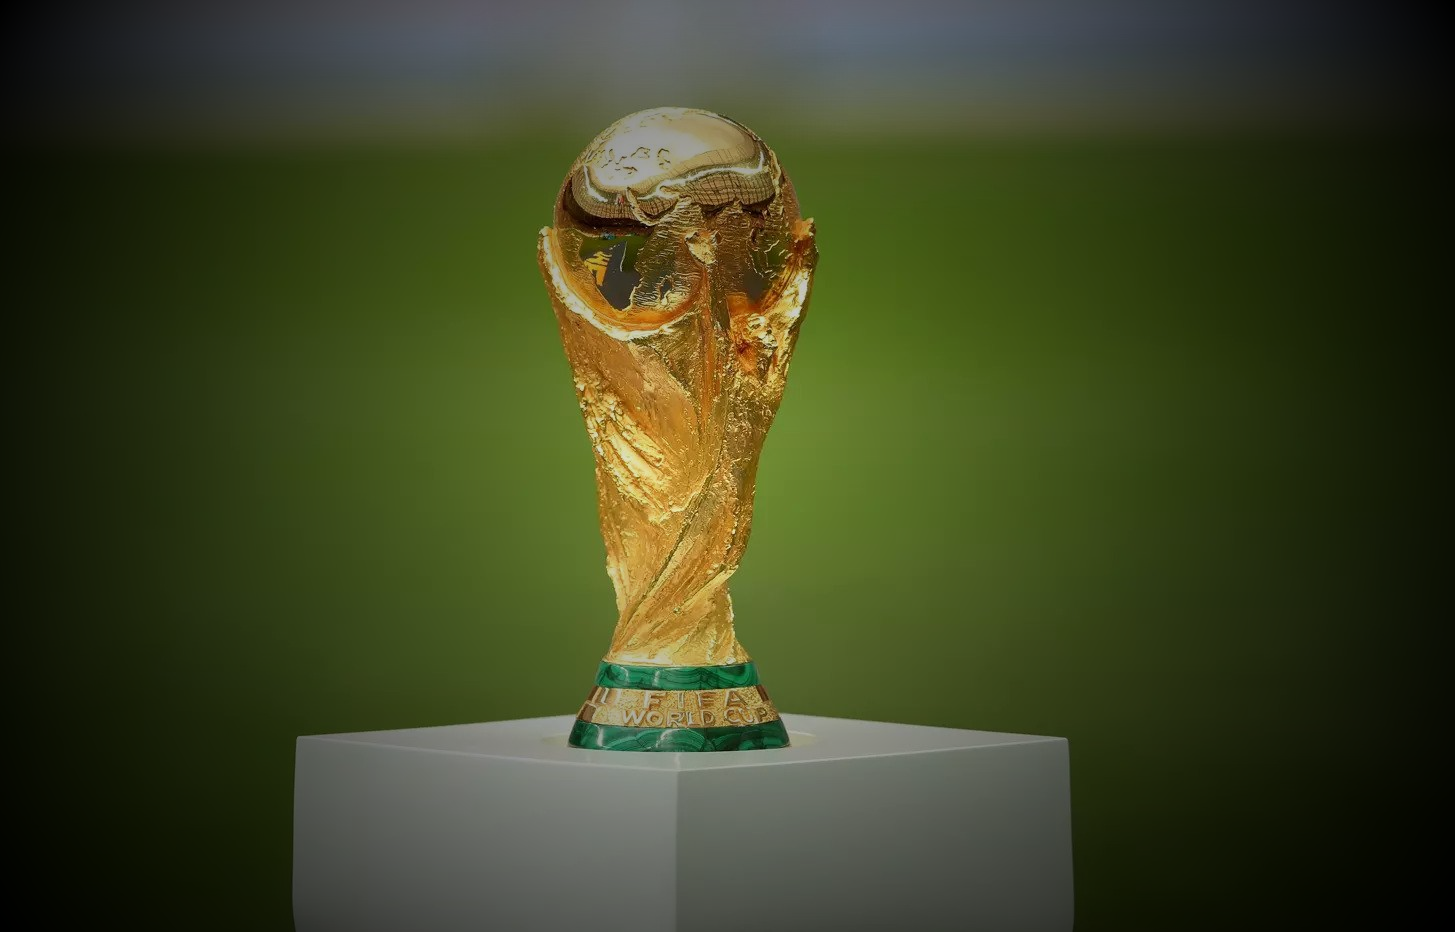

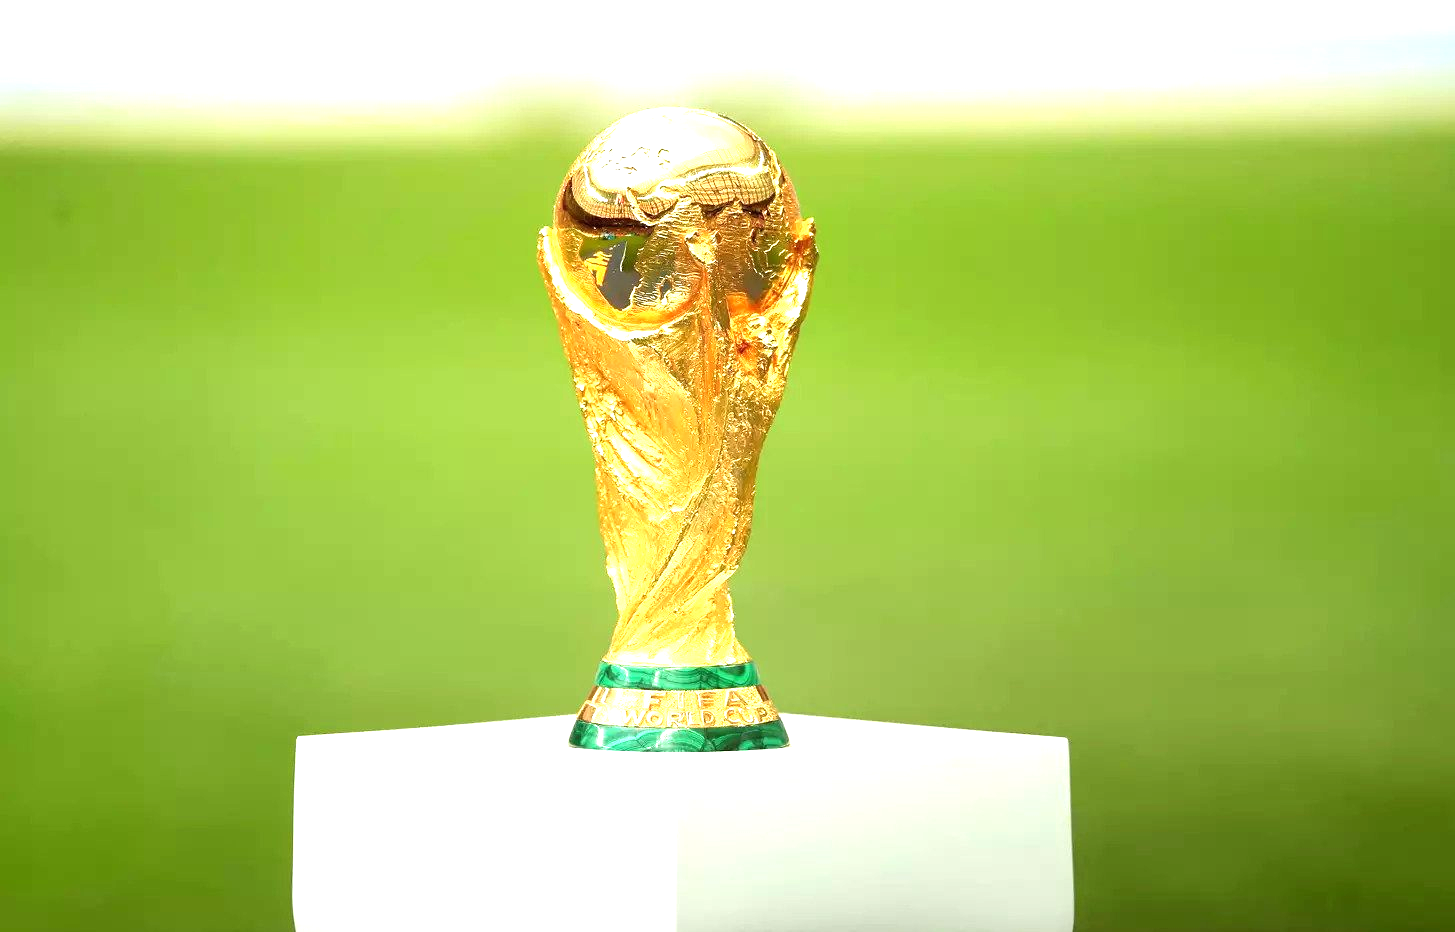

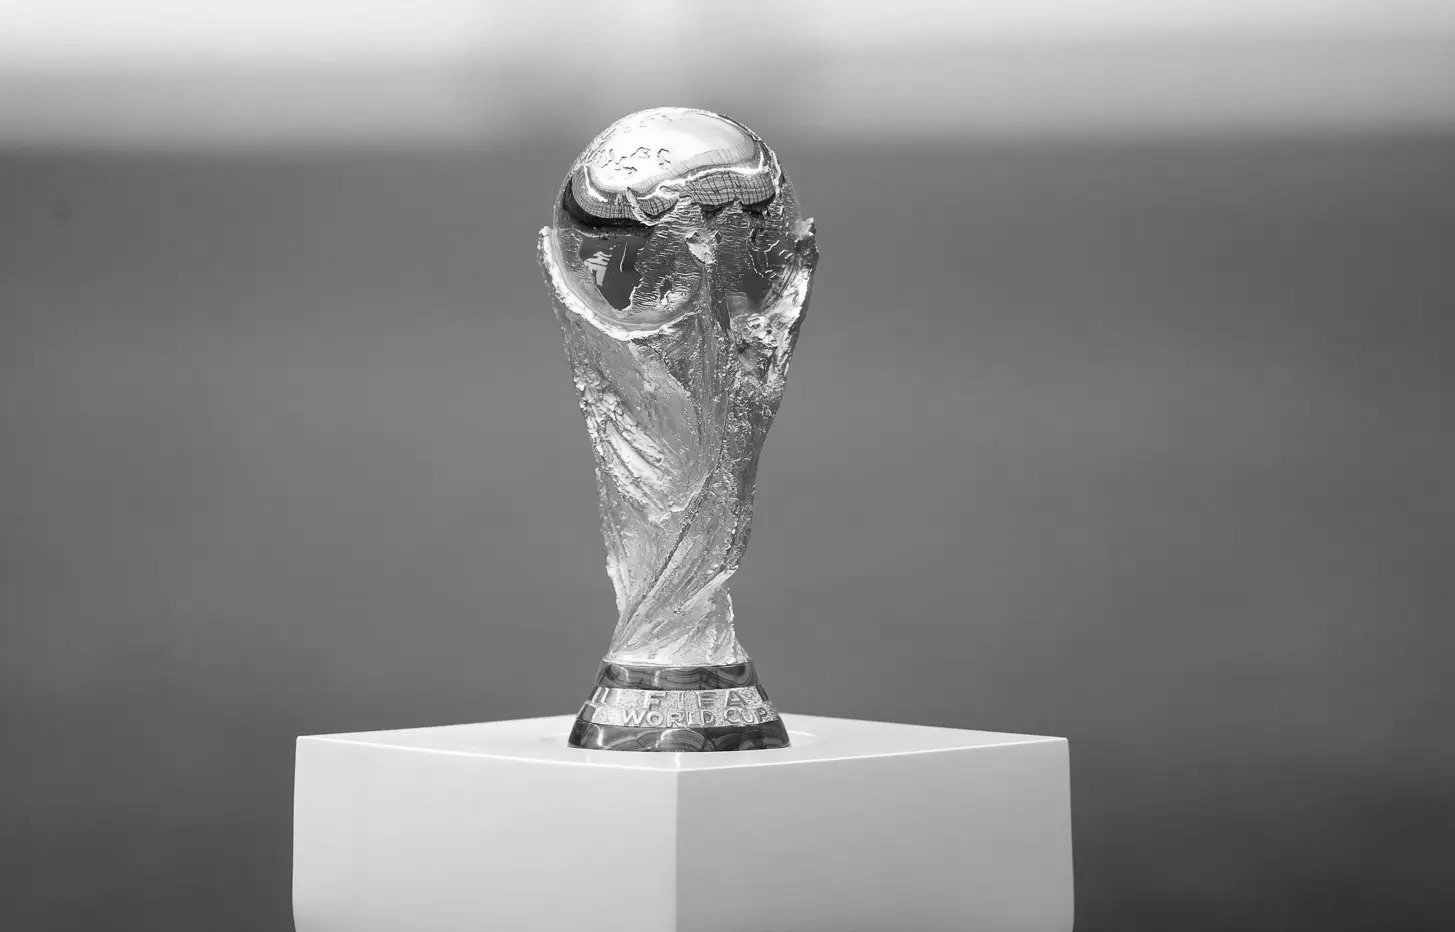

In [5]:
from IPython.display import display

# Load the image and convert it to a NumPy array
image_array = np.array(Image.open('images/Fifa World Cup Trophy.jpg'))

# Create a list of modified image arrays
modified_image_arrays = []

# Make a copy of the image array for each modification
for _ in range(4):
    modified_image_arrays.append(image_array.copy())

# Apply the modifications to the copies
# Modification 1: Make the top half of the image greener
rows, cols, _ = modified_image_arrays[0].shape
for row in range(rows // 2):  # top half
    for col in range(cols):  # all the columns
        pixel = modified_image_arrays[0][row, col, :]
        pixel[1] = (pixel[1] + 255) // 2  # make pixel greener
        modified_image_arrays[0][row, col, :] = pixel

# Modification 2: Add a vignette effect
rows, cols, _ = modified_image_arrays[1].shape
center_row, center_col = rows // 2, cols // 2
max_distance = np.sqrt(center_row**2 + center_col**2)

for row in range(rows):
    for col in range(cols):
        distance = np.sqrt((center_row - row)**2 + (center_col - col)**2)
        vignette_factor = 1 - (distance / max_distance)
        modified_image_arrays[1][row, col, :] = modified_image_arrays[1][row, col, :] * vignette_factor

modified_image_arrays[1] = modified_image_arrays[1].clip(0, 255)

# Modification 3: Increase brightness
brightness_factor = 1.5
modified_image_arrays[2] = (modified_image_arrays[2] * brightness_factor).clip(0, 255)

# Modification 4: Convert to grayscale
def rgb_to_gray(pixel_values):
    red, green, blue = pixel_values
    return 0.2989 * red + 0.5870 * green + 0.1140 * blue

modified_image_arrays[3] = np.apply_along_axis(rgb_to_gray, 2, modified_image_arrays[3])
modified_image_arrays[3] = np.repeat(modified_image_arrays[3][:, :, np.newaxis], 3, axis=2)

# Convert the modified image arrays and the original image array back to PIL Image objects
original_image = Image.fromarray(image_array.astype(np.uint8))
modified_images = [Image.fromarray(arr.astype(np.uint8)) for arr in modified_image_arrays]

# Display the images using IPython.display
display(original_image)

for i, modified_image in enumerate(modified_images):
    display(modified_image)

    





## Reshape the array into a data matrix $\mathbf{X}$ with rows of pixels



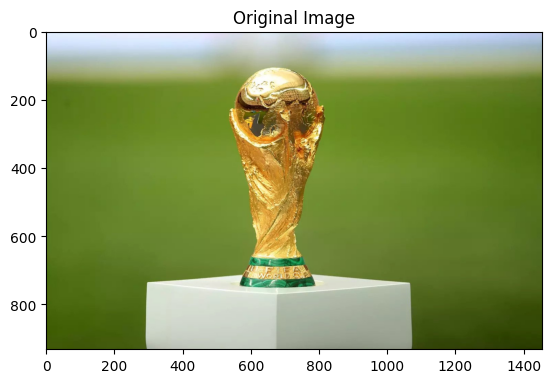

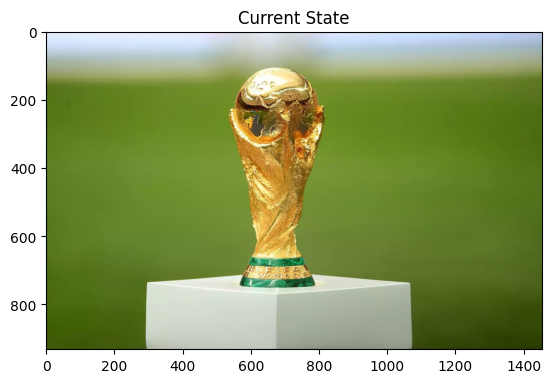

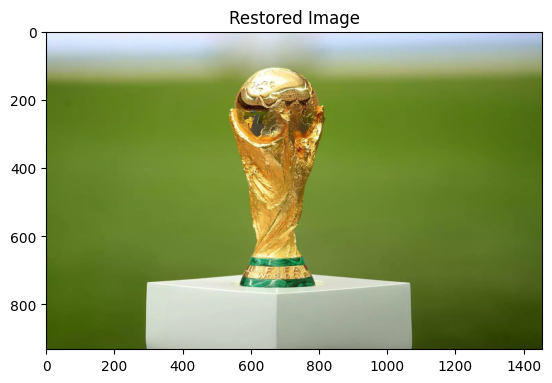

True


In [6]:
# Display the original image
plt.imshow(image_array)
plt.title('Original Image')
plt.show()

# Reshape the array into a data matrix X with rows of pixels
X = image_array.reshape(-1, 3)

# Display the current state
plt.imshow(X.reshape(image_array.shape))
plt.title('Current State')
plt.show()

# Restore the image to its original state
image_array_restored = X.reshape(image_array.shape)

# Compare the restored image with the original image
plt.imshow(image_array_restored)
plt.title('Restored Image')
plt.show()

# Check if the restored image is equal to the original image
print(np.array_equal(image_array, image_array_restored)) 

## Use $K$ means to segment the image into its $K$ mean colors 



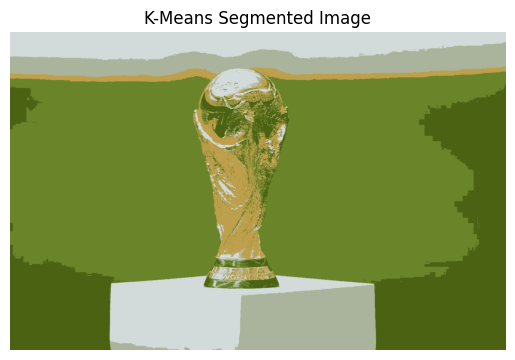

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Reshape the array into a data matrix X with rows of pixels
X = image_array.reshape(-1, 3)

# Use KMeans to cluster the pixels by color
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# Replace each pixel's RGB color with its corresponding cluster mean
X_clustered = kmeans.cluster_centers_[kmeans.labels_]

# Reshape the array back to its original shape
X_clustered = X_clustered.reshape(image_array.shape)

# Convert the modified array back to a PIL Image object
modified_image = Image.fromarray(X_clustered.astype(np.uint8))

# Display the modified image in notebook
plt.imshow(modified_image)
plt.title('K-Means Segmented Image')
plt.axis('off')
plt.show()



## Save an image that you like



In [8]:
# Use KMeans to cluster the pixels by color
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)

# Replace each pixel's RGB color with its corresponding cluster mean
X_clustered = kmeans.cluster_centers_[kmeans.labels_]

# Reshape the array back to its original shape
X_clustered = X_clustered.reshape(image_array.shape)

# Convert the modified array back to a PIL Image object
modified_image = Image.fromarray(X_clustered.astype(np.uint8))

# Save the modified image
modified_image.save('modified_image.jpg')

## Problem-solving: Lossy Compression Ratio

 

In [9]:
# total space in # of bits
total_space = image_array.size * 8
print("Total amount of uncompressed space:", total_space)

# Assuming you are using K-means for compression, where K is the number of clusters (unique colors)
def compressed_space(K):
    # K * 24 for the color data (each color channel requires 8 bits)
    color_data_space = K * 24

    # Each pixel requires log2(K) bits to store the cluster index
    pixel_data_space = image_array.size * np.log2(K)

    return color_data_space + pixel_data_space

# Calculate compressed space for K=4, K=8, and K=24
compressed_space_k4 = compressed_space(4)
compressed_space_k8 = compressed_space(8)
compressed_space_k24 = compressed_space(24)

print("Space for K=4:", compressed_space_k4)
print("Space for K=8:", compressed_space_k8)
print("Space for K=24:", compressed_space_k24)

# Calculate compression ratios
compression_ratio_k4 = compressed_space_k4 / total_space
compression_ratio_k8 = compressed_space_k8 / total_space
compression_ratio_k24 = compressed_space_k24 / total_space

print("Compression ratio for K=4:", compression_ratio_k4)
print("Compression ratio for K=8:", compression_ratio_k8)
print("Compression ratio for K=24:", compression_ratio_k24)


Total amount of uncompressed space: 32545440
Space for K=4: 8136456.0
Space for K=8: 12204732.0
Space for K=24: 18653028.746183794
Compression ratio for K=4: 0.2500029497219887
Compression ratio for K=8: 0.3750058994439774
Compression ratio for K=24: 0.5731380109220767


## <u><b> Interpretation </u></b>

 -  The uncompressed size of the image is 4068180 bytes.
 -  After compressing the image with different values of K, we get the following compressed sizes:

            - For K=4, the compressed size is 1,017,057 bytes.
            - For K=8, the compressed size is 1,525,591 bytes.
            - For K=24, the compressed size is 2,331,628 bytes.
 - We can then compute the compression ratio for each value of K by dividing the compressed size by the uncompressed size : 

            - For K=4, the compression ratio is 0.2500029497219887
            - For K=8, the compression ratio is 0.3750058994439774
            - For K=24, the compression ratio is 0.5731380109220767. 
            
 - The more clusters (K) we use to compress an image, the better the compression ratio. However, it is important to note that the compression ratios are still relatively high, which suggests that there is still room for improvement in the compression algorithm
 
- The compressed sizes obtained for K=4 and K=8 are not significantly different, suggesting that increasing K beyond 8 may not lead to a substantial improvement in the compression ratio. 

- These findings highlight the trade-off between image quality and storage space and the need for carefully selecting the compression parameters based on the specific requirements and constraints of a given application.

- The following is the general formula that takes into account the fact that each bit will have a logarithmic base 2 value greater than the previous one. The formula uses the ceiling function because certain numbers, such as 17, require 5 bits as they exceed the value of 16.

$$\frac{\lceil log_2(k) \rceil}{24}$$
            

## <u> <b> Conclusion </u> </b> 

In this project, we explored the fundamentals of image processing and compression using Python. We utilized the Pillow library to read and manipulate images, such as resizing, cropping, and converting image formats. Furthermore, we examined the principles of compression, and lossy compression and how to implement it using the KMeans algorithm from the scikit-learn library. We took  the following steps : 


        - We imported the necessary libraries, including Pillow and scikit-learn.

        - We loaded an image from a file using Pillow's Image module.

        - We displayed the image using the show() method.

        - We manipulated the image by resizing, cropping, and converting its format using Pillow's Image module.

        - We converted the image to a 3D NumPy array to prepare it for compression.

        - We computed the space required to store the uncompressed image by multiplying the number of pixels (number of columns  times number of rows) by the color channels (3 for RGB images) and the number of bits used to store each color (8 bits per channel).

        - We compressed the image using the KMeans algorithm from the scikit-learn library with different values of K (number of  clusters).

        - We computed the space required to store the compressed image for each value of K.
        
  
- Throughout our experiments, we found that increasing the number of clusters (K) used in compressing the image produced a slightly better compression ratio. Nonetheless, the compression ratios were still relatively low, implying that there may be an opportunity for further optimization of the compression algorithm used.

- In conclusion, this project lays the groundwork for further exploration and experimentation with image processing and compression techniques in Python. With more advanced techniques and algorithms, it is possible to achieve higher compression ratios while maintaining the quality of the original image

## <b> <u> Acknowledgements </b> </u>

I would like to express my gratitude to my lab partner Arthur. He and I collaborated extensively, discussing the optimal approach for various scenarios and assisting each other in problem-solving. Our teamwork allowed us to gain a deeper understanding of the problem and explore it more thoroughly.

## <b> <u> References </b> </u> 


- "NumPy User Guide." NumPy v1.21 Manual. Accessed 16 April 2023, https://numpy.org/doc/stable/user/index.html.

- "Pillow (PIL Fork)." Pillow (PIL Fork) — Pillow (PIL Fork) 8.4.0 Documentation. Accessed 16 April 2023, https://pillow.readthedocs.io/en/stable/.

- "Python Software Foundation." Python Software Foundation. Accessed 16 April 2023, https://www.python.org/.

- "scikit-learn: Machine Learning in Python." Scikit-learn.org. Accessed 16 April 2023, https://scikit-learn.org/stable/index.html.

- Conradt, Michael. “Image Compression from Scratch in Python.” Medium, 27 June 2020, https://medium.com/@mhconradt/image-compression-from-scratch-in-python-ee357fea3f9e.

- GeeksforGeeks. “How to Compress Images Using Python and PIL?” GeeksforGeeks, 5 Apr. 2021, https://www.geeksforgeeks.org/how-to-compress-images-using-python-and-pil/.

- Scicoding. “PCA Using Python: Image Compression.” Scicoding, 28 Jan. 2021, https://scicoding.com/pca-using-python-image-compression/.

- OpenAI. "ChatGPT by OpenAI." Accessed April 14 , 2023. https://www.openai.com/chatgpt
